In [30]:
# Basic imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2

# preprocessing and split
from sklearn.model_selection import train_test_split as split
from sklearn.preprocessing import StandardScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


# Scores and reports
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

# Warning ignor
import warnings
warnings.filterwarnings('ignore')

In [2]:
X_train = pd.read_csv("fashion-mnist_train.csv")
X_finel_test = pd.read_csv("fashion-mnist_test.csv")

## Basic info:

In [3]:
print("Test size: " , X_finel_test.shape)
print("Train size:" , X_train.shape)

Test size:  (10000, 785)
Train size: (60000, 785)


In [4]:
X_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top  
1 Trouser  
2 Pullover  
3 Dress  
4 Coat  
5 Sandal  
6 Shirt  
7 Sneaker  
8 Bag  
9 Ankle boot  

In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


# Modeling:

In [6]:
y_train = X_train["label"]
x_train = X_train.drop(["label"], axis=1)/255
x_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.000000,0.000000,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.000000,0.000000,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.286275,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.627451,0.635294,0.639216,0.529412,0.368627,0.000000,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [7]:
x_train , x_test , y_train , y_test = split(x_train,y_train ,train_size = 0.8 , shuffle = True , random_state = 1)

In [8]:
# Models:
LR = LogisticRegression(multi_class="ovr")
XG = XGBClassifier(n_estimators= 20, n_jobs=-1, learning_rate=0.5, seed=0)

In [9]:
LR.fit(x_train,y_train)
XG.fit(x_train,y_train)

[14:51:15] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, seed=0, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [10]:
print("LogisticRegression mean accuracy: {:.2f}%".format(LR.score(x_test, y_test)*100))
print("xgboost mean accuracy: {:.2f}%".format(XG.score(x_test, y_test)*100))

LogisticRegression mean accuracy: 85.10%
xgboost mean accuracy: 87.94%


## Let as use pca to reduce Dimensions.

### we need to find the best 'n_components'  Given the relationship between the dimensions and the representation of the data.

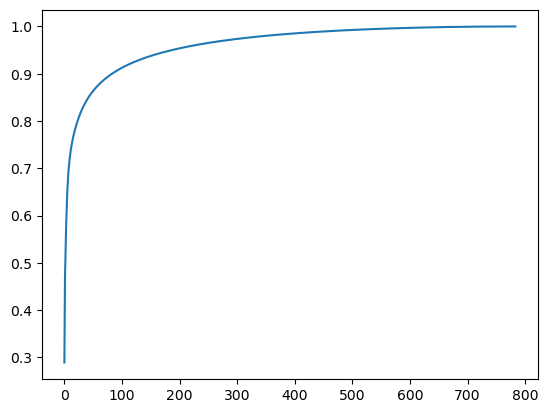

In [11]:
pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)
plt.show()

## We will try the same model after PCA

In [12]:
pca = PCA(n_components=200)
pca_x_train = pca.fit_transform(x_train)
pca_x_test = pca.transform(x_test)

In [13]:
LR_PCA = LogisticRegression(multi_class="ovr")
XG_PCA = XGBClassifier(n_estimators= 20, n_jobs=-1, learning_rate=0.5, seed=0)

In [14]:
LR_PCA.fit(pca_x_train, y_train)
XG_PCA.fit(pca_x_train, y_train)

[14:52:32] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, seed=0, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [15]:
print("LogisticRegression mean accuracy: {:.2f}%".format(LR_PCA.score(pca_x_test, y_test)*100))
print("xgboost mean accuracy: {:.2f}%".format(XG_PCA.score(pca_x_test, y_test)*100))

LogisticRegression mean accuracy: 85.06%
xgboost mean accuracy: 85.68%


In [16]:
score_list = [LR.score(x_test, y_test)*100,XG.score(x_test, y_test)*100 , LR_PCA.score(pca_x_test, y_test)*100 , XG_PCA.score(pca_x_test, y_test)*100 ]
principalDf = pd.DataFrame(data = score_list
             , columns = ['mean accuracy'], index = ['LR', 'xgboost', 'Lr_pca', 'xgboost_pca'])
principalDf

,mean accuracy
LR,85.100000
xgboost,87.941667
Lr_pca,85.058333
xgboost_pca,85.683333


# Final result:

We can see that xgboost with PCA use only 25% of the data and the final result is 85.66% (vs 100% of the data with 87.94%) so we will prefer to use this model! 

Lat us test on the real test file:

In [17]:
X_finel_test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [18]:
y_test = X_finel_test["label"]
x_test = X_finel_test.drop(["label"], axis=1)/255
pca_x_test = pca.transform(x_test)

In [19]:
print("xgboost mean accuracy: {:.2f}%".format(XG_PCA.score(pca_x_test, y_test)*100))
print("LR_PCA mean accuracy: {:.2f}%".format(LR_PCA.score(pca_x_test, y_test)*100))

xgboost mean accuracy: 85.78%
LR_PCA mean accuracy: 85.57%


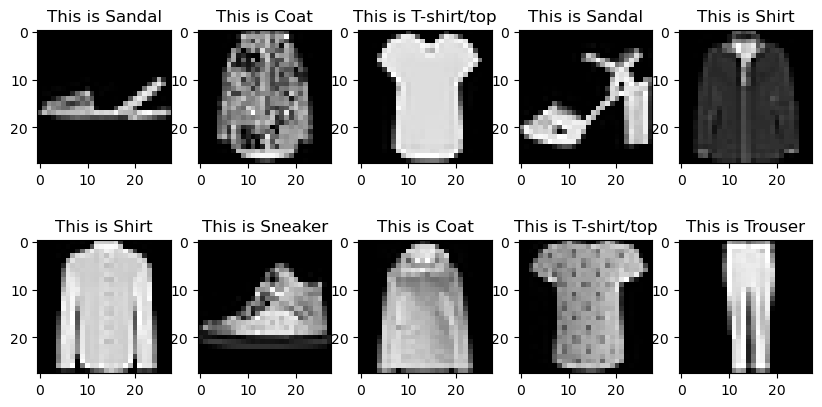

In [85]:
classes = {0: 'T-shirt/top',
           1: 'Trouser',
           2: 'Pullover',
           3: 'Dress',
           4: 'Coat',
           5: 'Sandal',
           6: 'Shirt',
           7: 'Sneaker',
           8: 'Bag',
           9: 'Ankle boot'}

f, axarr = plt.subplots(2,5 , figsize = (10,5))
for i,j in enumerate(np.random.randint(0, len(x_test), 10)) :
    image = x_test[j:j+1]
    image_class = classes[XG_PCA.predict(pca.transform(image))[0]]
    image = np.array(image).reshape(28,28)
    axarr[i//5, i%5].imshow(image)
    axarr[i//5, i%5].set_title("This is {}".format(image_class))
plt.show()